# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [3]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [5]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 36.0 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 40.0 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 7.2 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 66.3 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 66.4 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 70.6 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 59.9 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 72.5 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 73.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 63.1 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 11.5 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 74.6 MB/s eta 0:00:01


     |████████████████████████████████| 93 kB 2.7 MB/s  eta 0:00:01
  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257186 sha256=986179ff13a488854c9dbed2fff93a78f034d99ea7d8aadc3252d141052eab3b
  Stored in directory: /root/.cache/pip/wheels/f7/55/ff/f3d7554e69382d31cf7ad857cf518af9b923134fca7d925187
Successfully built bokeh
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 4.10.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 6.0.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4.6.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement prompt-toolkit>=3.0.30, but you'll have prompt-toolkit 3.0.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement traitlets>=5.4, but you'll have traitlets 4.3.3 which is incompatible.


## Imports

In [40]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import tqdm
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
# Define transforms
## YOUR CODE HERE ##
train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5],
                        std=[0.5])
])

test_transform = transforms.Compose([
    transforms.Normalize(mean=[0.5,0.5,0.5],
                        std=[0.5,0.5,0.5])
])
# Create training set and define training dataloader
## YOUR CODE HERE ##
train_dataset = torchvision.datasets.MNIST(root='/',download=True,train=True, transform=train_transform)
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [50000,10000])
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100, num_workers=0)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=100, num_workers=0)

# Create test set and define test dataloader
## YOUR CODE HERE ##
test_dataset = torchvision.datasets.MNIST(root='/',download=True,train=False, transform=test_transform)
test_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100, num_workers=0)

print('Train_size = ', len(train_dataset))
print('Test_size  = ', len(test_dataset))
print('Val_size   = ', len(val_dataset))
print('image_dimensions', train_dataset[0][0].size())

Train_size =  50000
Test_size  =  10000
Val_size   =  10000
image_dimensions torch.Size([1, 28, 28])


## Justify your preprocessing

I have choosen to normalise the images as the optimizer perform better on normalized datasets. The images needed to be cased to tensors as well so that they are in data formate that a pytorch model accepts.

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [3]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

0


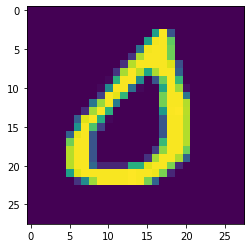

0


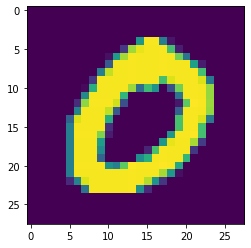

6


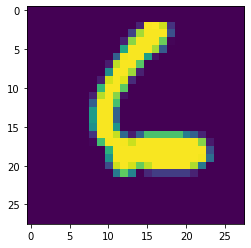

4


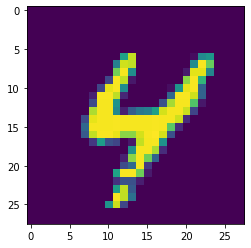

1


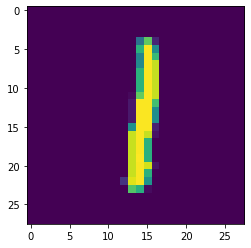

In [4]:
# Explore data
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [24]:
## YOUR CODE HERE ##
class MnistNN(nn.Module):
    def __init__(self, in_features=28*28, num_class=10, dropout=0.2, hidden_dim1=512, hidden_dim2=128):
        super().__init__()
        self.fc1 = nn.Sequential(
                                nn.Linear(in_features=in_features, out_features=hidden_dim1),
                                nn.Dropout(dropout),
                                nn.BatchNorm1d(num_features=hidden_dim1),
                                nn.ReLU()
                               )
        self.fc2 = nn.Sequential(
                                nn.Linear(in_features=hidden_dim1, out_features=hidden_dim2),
                                nn.Dropout(dropout),
                                nn.BatchNorm1d(num_features=hidden_dim2),
                                nn.ReLU()
                               )
        self.clf= nn.Sequential(
                                nn.Linear(in_features=hidden_dim2, out_features=num_class),
                                nn.Softmax(dim=1)
                               )
    def forward(self,x):
        x = x.reshape(x.size()[0],-1)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.clf(x)
        return x

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [25]:
## YOUR CODE HERE ##
model = MnistNN()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
print(model)

MnistNN(
  (fc1): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Dropout(p=0.2, inplace=False)
    (2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (fc2): Sequential(
    (0): Linear(in_features=512, out_features=128, bias=True)
    (1): Dropout(p=0.2, inplace=False)
    (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (clf): Sequential(
    (0): Linear(in_features=128, out_features=10, bias=True)
    (1): Softmax(dim=1)
  )
)


## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [30]:
## YOUR CODE HERE ##
def train(num_epoch, model):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f'Start Training on: {device}!')
    model = model.to(device)
    num_epoch = num_epoch
    bar = tqdm.tqdm(range(num_epoch), desc='Epoch: ')
    losses = []
    training_accuracy = []
    validation_accuracy = []
    for epoch in bar:
        epoch_loss =0
        train_acc = 0
        for x,y in train_loader:
            model.train()
            x,y = x.to(device), y.to(device)
            y = F.one_hot(y)
            logit = model(x)
            loss = loss_fn(y.float(),logit)
            epoch_loss+=loss.item()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_acc += (logit.argmax(dim=1)==y.argmax(dim=1)).sum().item()

        epoch_loss /= len(train_loader.dataset)
        train_acc /= len(train_loader.dataset)
        losses.append(epoch_loss)
        training_accuracy.append(train_acc)

        model.eval()
        val_acc = 0
        for x,y in val_loader:
            x,y = x.to(device), y.to(device)
            pred = model(x)
            val_acc += (pred.argmax(dim=1)==y).sum().item()
        val_acc /= len(val_loader.dataset)
        validation_accuracy.append(val_acc)    

        bar.postfix = f"Train_Losses: {epoch_loss:.3f}, Train_Acc: {train_acc:.1%}, Val_acc: {val_acc:.1%}"
    return model, training_accuracy, validation_accuracy, losses
        
model, train_accuracy, val_accuracy, losses = train(10, model)

Start Training on: cuda!


Epoch: 100%|██████████| 10/10 [02:03<00:00, 12.33s/it, Train_Losses: 0.015, Train_Acc: 98.7%, Val_acc: 97.2%]


Plot the training loss (and validation loss/accuracy, if recorded).

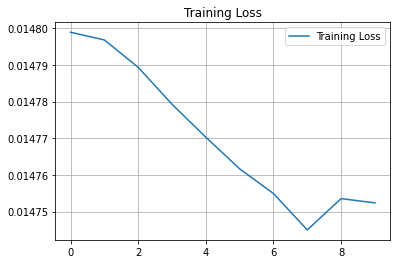

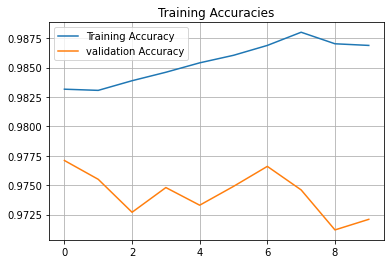

In [34]:
## YOUR CODE HERE ##
plt.plot(losses, label='Training Loss')
plt.grid()
plt.legend()
plt.title('Training Loss')
plt.show()
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='validation Accuracy')
plt.grid()
plt.legend()
plt.title('Training Accuracies')
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [48]:
## YOUR CODE HERE ##
def test(model):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    with torch.no_grad():
        acc = 0
        for x,y in test_loader:
            x,y = x.to(device), y.to(device)
            pred = model(x)
            acc += (pred.argmax(dim=1)==y).sum().item()
        acc /= len(test_loader.dataset)
        print(f"test_Acc = {acc:.1%}")
    return y, pred.argmax(dim=1)
true, pred = test(model)

test_Acc = 98.8%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

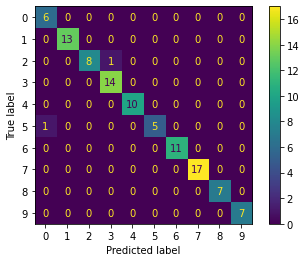

In [51]:
## YOUR CODE HERE ##
# the model performs very well 
cm = confusion_matrix(true.cpu().detach().numpy(), pred.detach().cpu().numpy())
disp = ConfusionMatrixDisplay(cm)
disp.plot();

## Saving your model
Using `torch.save`, save your model for future loading.

In [39]:
## YOUR CODE HERE ##
torch.save(model,'/model.pt' )